In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import time
import edge_detection as edge
import lane_modified

In [3]:
image = '../test_images/test1.jpg'
frame = cv2.imread(image)
lane_detecticted_img = lane_modified.lane_detection(frame)
cv2.imshow('lane detection', lane_detecticted_img)
cv2.waitKey(0)

-1

#### Loading Yolo weights, and config

In [4]:
weights_path = 'yolov3.weights'
config_path = 'yolov3.cfg'
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [5]:
names = net.getLayerNames()

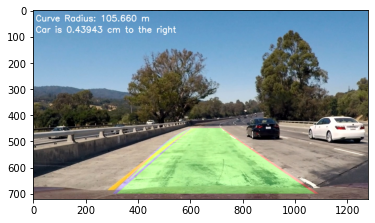

In [6]:
lane_detecticted_img = cv2.cvtColor(lane_detecticted_img, cv2.COLOR_BGR2RGB)
plt.imshow(lane_detecticted_img)

In [7]:
(H,W) = lane_detecticted_img.shape[:2]
layers_names = [names[i - 1] for i in net.getUnconnectedOutLayers()]

In [8]:
blob = cv2.dnn.blobFromImage(lane_detecticted_img, 1/255.0, (416,416), crop=False, swapRB = False)
net.setInput(blob)
# calculate the runtime of the algorithm
start_t = time.time()
layers_output = net.forward(layers_names)
print("A forward pass through yolov3 took {}".format(time.time() - start_t))

A forward pass through yolov3 took 0.39382338523864746


In [9]:
boxes = []
confidences = []
classIDs = []

In [10]:
for output in layers_output:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        if(confidence > 0.85):
            box = detection[:4] * np.array([W,H,W,H])
            bx,by,bw,bh = box.astype("int")

            x = int(bx - (bw/2))
            y = int(by - (bh/2))

            boxes.append([x,y,int(bw),int(bh)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [11]:
idxs = cv2.dnn.NMSBoxes(boxes,confidences,score_threshold=0.4,nms_threshold=0.6)

In [12]:
labels_path = 'coco.names'
labels = open(labels_path).read().strip().split("\n")

In [13]:
for i in idxs.flatten():
    (x,y) = [boxes[i][0],boxes[i][1]]
    (w,h) = [boxes[i][2],boxes[i][3]]
    
    cv2.rectangle(lane_detecticted_img,(x,y),(x+w,y+h),(255,165,0),2)
    cv2.putText(lane_detecticted_img,"{}: {}".format(labels[classIDs[i]],confidences[i]), (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,165,0),2)

In [14]:
cv2.imshow("Image", cv2.cvtColor(lane_detecticted_img,cv2.COLOR_RGB2BGR))
cv2.waitKey(0)

-1